In [137]:
import DatasetPrepare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [138]:
# get Gala dataset
df = pd.DataFrame(DatasetPrepare.getGalaDatasets())

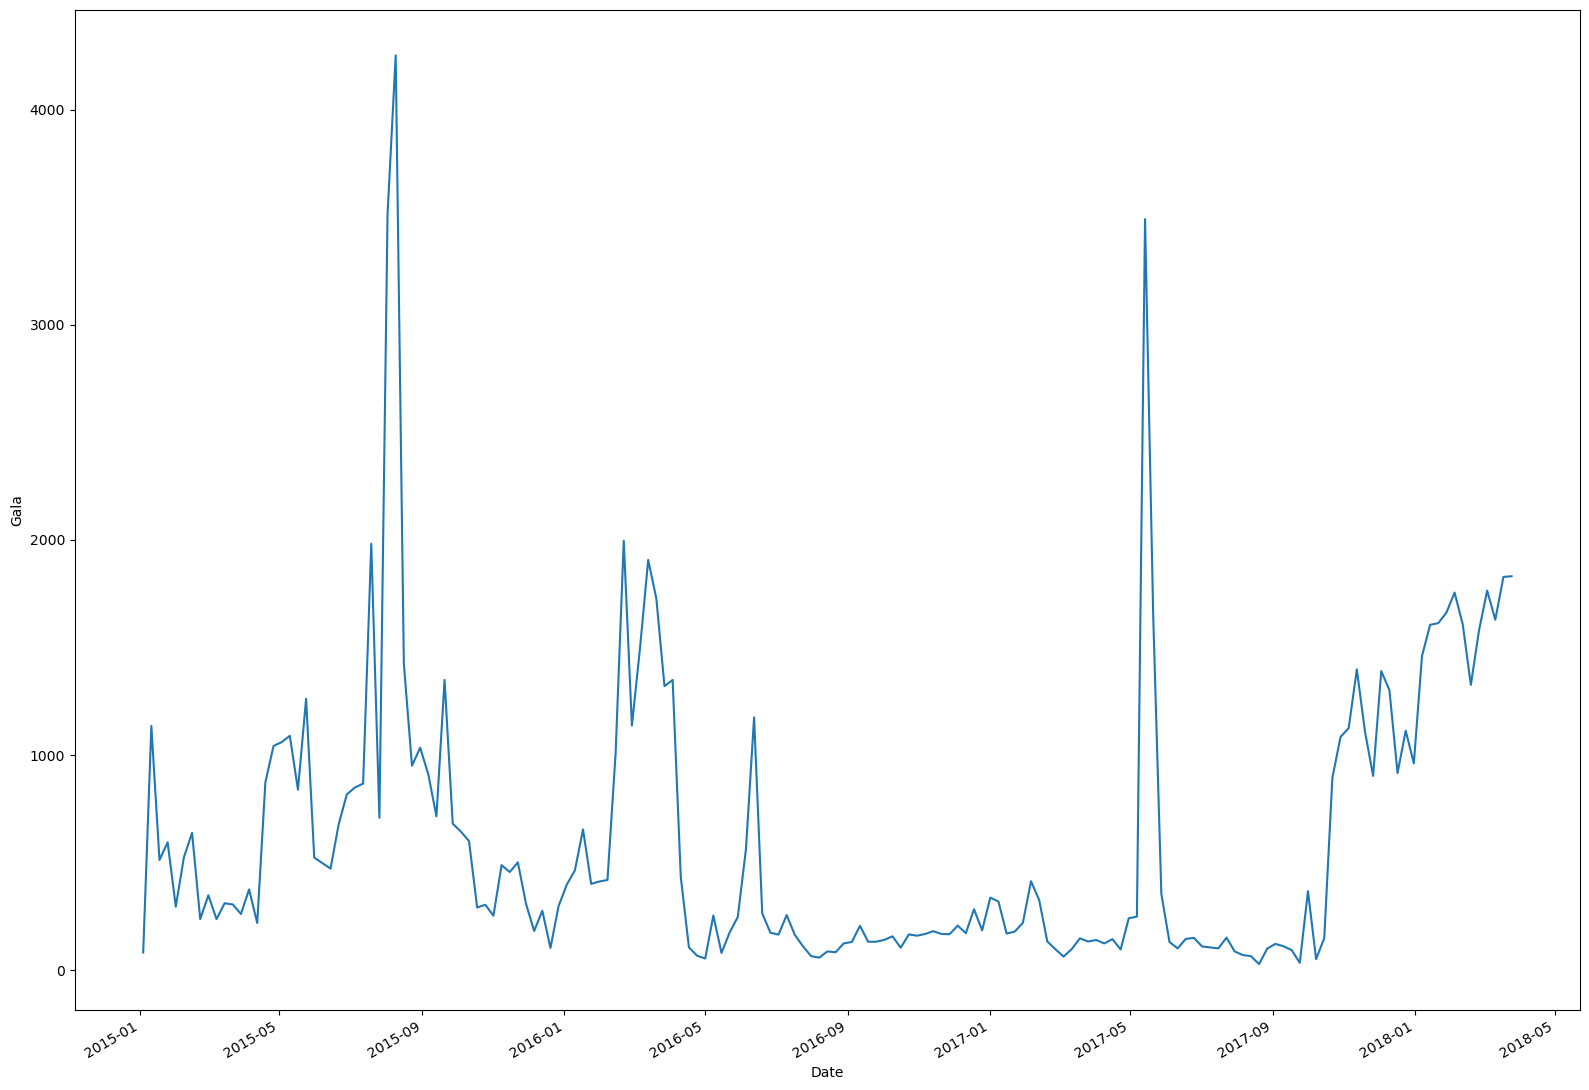

In [139]:
fig, ax = plt.subplots(figsize=(16,11))
ax.plot(df)
ax.set_xlabel('Date')
ax.set_ylabel('Gala')

fig.autofmt_xdate()
plt.tight_layout()

In [140]:
# mape function
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [141]:
# add target by shift Gala column
df['y'] = df['Gala'].shift(-1)
# Drop rows with NaN in 'y'
df = df.dropna(subset=['y'])
display(df)

,Gala,y
Date,,
2015-01-04,82.0,1135.0
2015-01-11,1135.0,512.0
2015-01-18,512.0,594.0
2015-01-25,594.0,295.0
2015-02-01,295.0,525.0
...,...,...
2018-02-18,1326.0,1579.0
2018-02-25,1579.0,1764.0
2018-03-04,1764.0,1629.0


In [142]:
# add baseline from Gala
df['baseline_pred'] = df['Gala']
display(df)

baseline_mape = mape(df['y'], df['baseline_pred'])

,Gala,y,baseline_pred
Date,,,
2015-01-04,82.0,1135.0,82.0
2015-01-11,1135.0,512.0,1135.0
2015-01-18,512.0,594.0,512.0
2015-01-25,594.0,295.0,594.0
2015-02-01,295.0,525.0,295.0
...,...,...,...
2018-02-18,1326.0,1579.0,1326.0
2018-02-25,1579.0,1764.0,1579.0
2018-03-04,1764.0,1629.0,1764.0


In [143]:
# Split the data into features (X) and target variable (y)
X = df['Gala']
y = df['y']

# Split the data into training and testing sets
X_train = df['Gala'].values.reshape(-1,1)
y_train = df['y'].values.reshape(-1,1)
X_test = df['Gala'].values.reshape(-1,1)

# Random Forest

In [144]:
# Create a linear regression model
rf = RandomForestRegressor(random_state = 42)

# Split the data into features (X) and target variable (y)
X = df['Gala']
y = df['y']

# Split the data into training and testing sets
X_train = df['Gala'].values.reshape(-1,1)
y_train = df['y'].values.reshape(-1,1)
X_test = df['Gala'].values.reshape(-1,1)

# Fit the model on the training set
rf.fit(X=X_train, y=y_train)

# Make predictions on the test set
rf_pred = rf.predict(X_test)

df.loc[:, 'rf_pred'] = rf_pred
display(df)

rf_mae = mean_absolute_error(y_train, rf_pred)
rf_mse = mean_squared_error(y_train, rf_pred)
rf_r2 = r2_score(y_train, rf_pred)
rf_mape = mape(y_train, rf_pred)
print("Random Forest mean absolute error =", rf_mae)
print("Random Forest mean_squared_error =", rf_mse)
print("Random Forest R2 score =", rf_r2)
print("Random Forest mape =", rf_mape)

/Users/nonthipat/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Gala,y,baseline_pred,rf_pred
Date,,,,
2015-01-04,82.0,1135.0,82.0,775.390
2015-01-11,1135.0,512.0,1135.0,830.660
2015-01-18,512.0,594.0,512.0,509.995
2015-01-25,594.0,295.0,594.0,354.710
2015-02-01,295.0,525.0,295.0,462.130
...,...,...,...,...
2018-02-18,1326.0,1579.0,1326.0,1407.180
2018-02-25,1579.0,1764.0,1579.0,1671.230
2018-03-04,1764.0,1629.0,1764.0,1609.750


Random Forest mean absolute error = 109.17130583900226
Random Forest mean_squared_error = 43329.66177163813
Random Forest R2 score = 0.9066524233170454
Random Forest mape = 248.22


# Gradient Boosting

In [145]:
# Create a linear regression model
gb = GradientBoostingRegressor()

# Split the data into features (X) and target variable (y)
X = df['Gala']
y = df['y']

# Split the data into training and testing sets
X_train = df['Gala'].values.reshape(-1,1)
y_train = df['y'].values.reshape(-1,1)
X_test = df['Gala'].values.reshape(-1,1)

# Fit the model on the training set
gb.fit(X=X_train, y=y_train)

# Make predictions on the test set
gb_pred = gb.predict(X_test)

df.loc[:, 'gb_pred'] = gb_pred
display(df)

gb_mae = mean_absolute_error(y_train, gb_pred)
gb_mse = mean_squared_error(y_train, gb_pred)
gb_r2 = r2_score(y_train, gb_pred)
gb_mape = mape(y_train, gb_pred)
print("Gradient Boosting mean absolute error =", gb_mae)
print("Gradient Boosting mean_squared_error =", gb_mse)
print("Gradient Boosting R2 score =", gb_r2)
print("Gradient Boosting mape =", gb_mape)

/Users/nonthipat/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


,Gala,y,baseline_pred,rf_pred,gb_pred
Date,,,,,
2015-01-04,82.0,1135.0,82.0,775.390,804.477283
2015-01-11,1135.0,512.0,1135.0,830.660,769.681173
2015-01-18,512.0,594.0,512.0,509.995,546.030254
2015-01-25,594.0,295.0,594.0,354.710,376.304975
2015-02-01,295.0,525.0,295.0,462.130,307.247314
...,...,...,...,...,...
2018-02-18,1326.0,1579.0,1326.0,1407.180,1389.605693
2018-02-25,1579.0,1764.0,1579.0,1671.230,1671.998749
2018-03-04,1764.0,1629.0,1764.0,1609.750,1584.239202


Gradient Boosting mean absolute error = 102.92865715168674
Gradient Boosting mean_squared_error = 23241.833945465587
Gradient Boosting R2 score = 0.9499287834760585
Gradient Boosting mape = 248.4


# Ada Boost

In [146]:
# Create a linear regression model
ab = AdaBoostRegressor(random_state = 42)

# Split the data into features (X) and target variable (y)
X = df['Gala']
y = df['y']

# Split the data into training and testing sets
X_train = df['Gala'].values.reshape(-1,1)
y_train = df['y'].values.reshape(-1,1)
X_test = df['Gala'].values.reshape(-1,1)

# Fit the model on the training set
ab.fit(X=X_train, y=y_train)

# Make predictions on the test set
ab_pred = ab.predict(X_test)

df.loc[:, 'ab_pred'] = ab_pred
display(df)

ab_mae = mean_absolute_error(y_train, ab_pred)
ab_mse = mean_squared_error(y_train, ab_pred)
ab_r2 = r2_score(y_train, ab_pred)
ab_mape = mape(y_train, ab_pred)
print("Gradient Boosting mean absolute error =", ab_mae)
print("Gradient Boosting mean_squared_error =", ab_mse)
print("Gradient Boosting R2 score =", ab_r2)
print("Gradient Boosting mape =", ab_mape)

/Users/nonthipat/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Gala,y,baseline_pred,rf_pred,gb_pred,ab_pred
Date,,,,,,
2015-01-04,82.0,1135.0,82.0,775.390,804.477283,500.133333
2015-01-11,1135.0,512.0,1135.0,830.660,769.681173,1141.960784
2015-01-18,512.0,594.0,512.0,509.995,546.030254,466.555556
2015-01-25,594.0,295.0,594.0,354.710,376.304975,667.375000
2015-02-01,295.0,525.0,295.0,462.130,307.247314,407.765957
...,...,...,...,...,...,...
2018-02-18,1326.0,1579.0,1326.0,1407.180,1389.605693,1141.960784
2018-02-25,1579.0,1764.0,1579.0,1671.230,1671.998749,1180.583333
2018-03-04,1764.0,1629.0,1764.0,1609.750,1584.239202,1255.984127


Gradient Boosting mean absolute error = 273.59998220530514
Gradient Boosting mean_squared_error = 104823.79042285595
Gradient Boosting R2 score = 0.7741720933279844
Gradient Boosting mape = 285.27


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


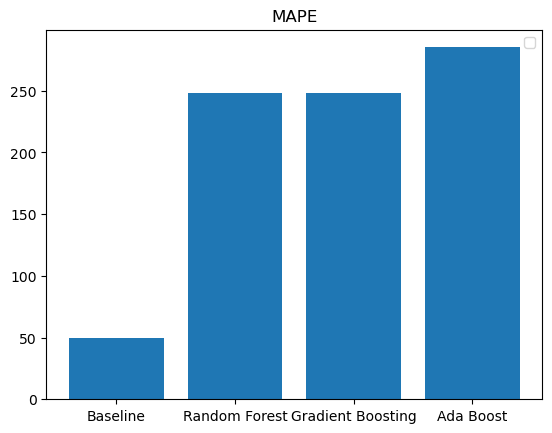

In [147]:
x = ['Baseline', 'Random Forest', 'Gradient Boosting', 'Ada Boost']
y = [baseline_mape, gb_mape, rf_mape, ab_mape]

plt.bar(x,y)
plt.title('MAPE')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


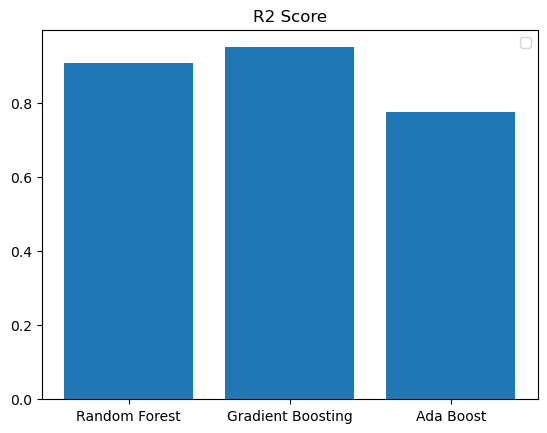

In [148]:
x = np.array(["Random Forest", "Gradient Boosting", "Ada Boost"])
y = np.array([rf_r2, gb_r2, ab_r2])

plt.bar(x,y)
plt.title('R2 Score')
plt.legend()
plt.show()